In [2]:
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K

In [3]:
IMAGE_SIZE= 256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [4]:
dataset=tf.keras.utils.image_dataset_from_directory(
    "PlantVillage",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True,
)

Found 16011 files belonging to 10 classes.


In [5]:
class_names= dataset.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [6]:
len(dataset)

501

2024-03-30 13:22:31.705509: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


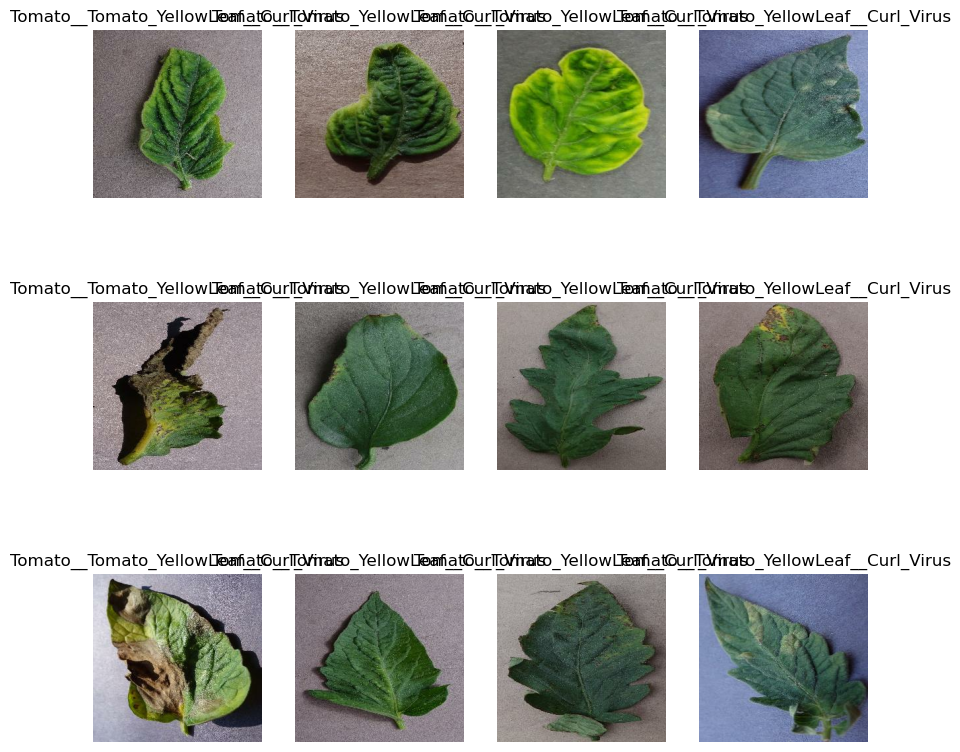

In [7]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[0]])
        plt.axis("off")

In [8]:
len(dataset)

501

In [9]:
tarin_size=0.8
train_ds=dataset.take(408)
len(train_ds)

408

In [10]:
test_ds=dataset.skip(408)
len(test_ds)

93

In [11]:
val_size=0.1
val_ds=test_ds.take(50)
len(val_ds)

50

In [12]:
test_ds=test_ds.skip(50)
len(test_ds)

43

In [13]:
def get_dataset_patotions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=100):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [14]:
train_ds, val_ds, test_ds= get_dataset_patotions_tf(dataset)

In [15]:
len(train_ds)

400

In [16]:
len(val_ds)

50

In [17]:
len(test_ds)

51

In [18]:
#prefetch and catche concept
train_ds = train_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)

In [19]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [20]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [21]:

input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes=10
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    
    
    layers.Dense(64, activation='relu'),
    
    layers.Dense(n_classes, activation='softmax')
])


model.build(input_shape=input_shape)

/Users/viditshrivastava/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [22]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 10)               │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,202 (719.54 KB)

 Trainable params: 184,202 (719.54 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    #in each epos what type of matrix?
    metrics=['accuracy']
)

In [24]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 356s 881ms/step - accuracy: 0.3026 - loss: 1.9305 - val_accuracy: 0.5161 - val_loss: 1.3053
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 367s 917ms/step - accuracy: 0.5729 - loss: 1.1922 - val_accuracy: 0.5801 - val_loss: 1.3325
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 380s 951ms/step - accuracy: 0.7111 - loss: 0.8183 - val_accuracy: 0.6580 - val_loss: 1.0133
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 387s 966ms/step - accuracy: 0.7826 - loss: 0.6161 - val_accuracy: 0.7391 - val_loss: 0.8058
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 389s 972ms/step - accuracy: 0.8216 - loss: 0.4949 - val_accuracy: 0.7346 - val_loss: 0.9436
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 393s 982ms/step - accuracy: 0.8401 - loss: 0.4587 - val_accuracy: 0.7131 - val_loss: 0.8542
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 390s 975ms/step - accuracy: 0.8641 - loss: 0.3807 - val_accuracy: 0.8277 - val_loss: 0.5004
Epoch 8/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 390s 975ms/step - accuracy: 0.8914 -

In [25]:
scores= model.evaluate(test_ds)

51/51 ━━━━━━━━━━━━━━━━━━━━ 12s 167ms/step - accuracy: 0.9802 - loss: 0.0504


In [26]:
scores
#loss, accouracy

[0.05302295833826065, 0.9807572960853577]

In [27]:
history

In [28]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 400}

In [29]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [30]:
history.history['accuracy']

[0.38382813334465027,
 0.6181250214576721,
 0.7410937547683716,
 0.7905468940734863,
 0.8307031393051147,
 0.8482031226158142,
 0.873828113079071,
 0.8895312547683716,
 0.8917187452316284,
 0.9020312428474426,
 0.917187511920929,
 0.9189843535423279,
 0.9203906059265137,
 0.9309375286102295,
 0.9369531273841858,
 0.9385937452316284,
 0.9446874856948853,
 0.9495312571525574,
 0.951171875,
 0.9482812285423279,
 0.9507031440734863,
 0.9545312523841858,
 0.9582812786102295,
 0.9549999833106995,
 0.9564843773841858,
 0.9568750262260437,
 0.9674218893051147,
 0.95703125,
 0.9643750190734863,
 0.9634374976158142,
 0.9635156393051147,
 0.9707812666893005,
 0.9634374976158142,
 0.967578113079071,
 0.971484363079071,
 0.9663281440734863,
 0.9703906178474426,
 0.9712499976158142,
 0.9717968702316284,
 0.9678124785423279,
 0.9732812643051147,
 0.9739843606948853,
 0.9727343916893005,
 0.9725000262260437,
 0.9761718511581421,
 0.974609375,
 0.9737499952316284,
 0.9760937690734863,
 0.97867184877395

In [31]:
acc= history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and validation error')

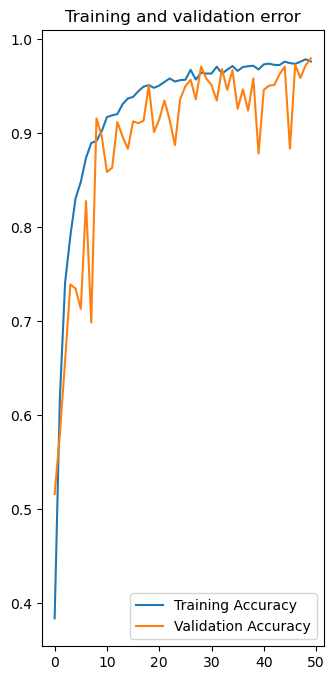

In [32]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation error')

first image predict
actual label: Tomato__Tomato_YellowLeaf__Curl_Virus
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
Tomato__Tomato_YellowLeaf__Curl_Virus


2024-03-30 18:59:00.654520: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


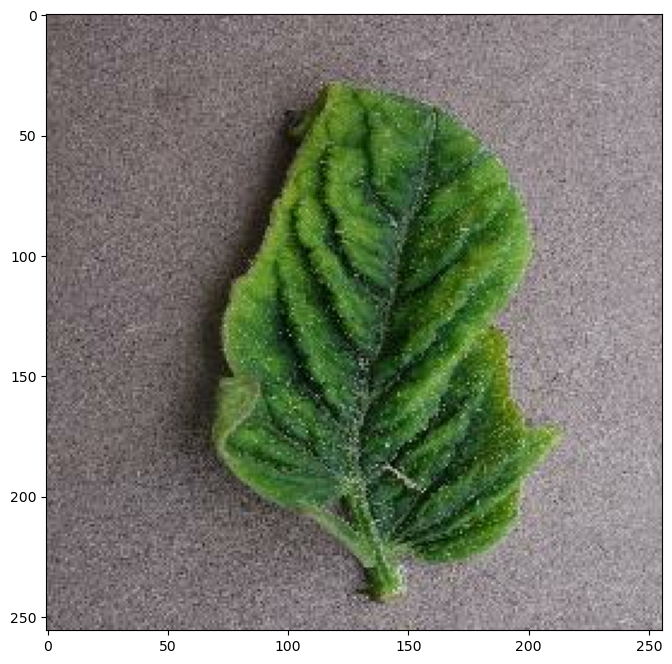

In [33]:
plt.figure(figsize=(8,8))
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image=image_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0].numpy()
    
    print("first image predict")
    plt.imshow(first_image)
    print('actual label:',class_names[first_label])
    
    batch_prediction=model.predict(image_batch)
    print(class_names[np.argmax(batch_prediction[0])])

In [34]:
def predict(model, img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array, 0)
    
    predictions=model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence=round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


2024-03-30 18:59:25.713682: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


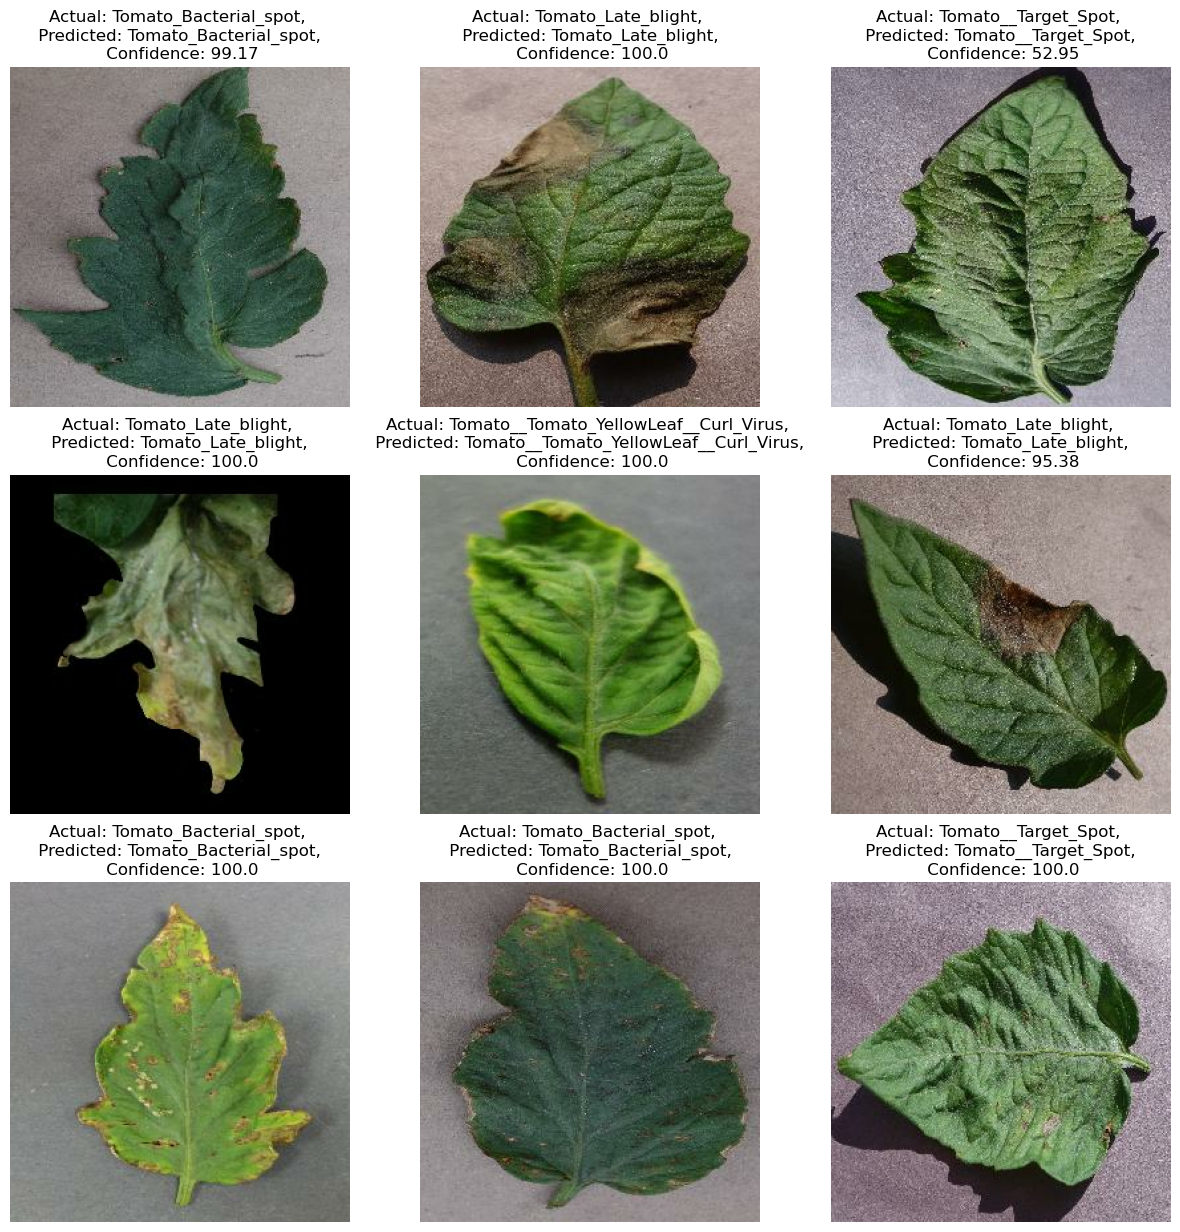

In [35]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}, \n Confidence: {confidence}")
        plt.axis("off")

In [36]:
model.save("tomato_model.keras")

In [ ]:
import os
model_version = max([int(i) for i in os.listdir("../saved_models") + [0]]) + 1
model.save(f"../saved_models/{model_version}")